In [2]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [5]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/IGR J17091-3624.txt")

IGR J17091-3624
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  90
Converting uncertainties to 68% (assuming Gaussian errors).
Added 10.0% systematic uncertainty to the X-ray data.


In [6]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,IGR J17091-3624,90,[Russell et al. (in prep.) & ],[Russell et al. (in prep.) & ],NaN,NaN


In [7]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,IGR J17091-3624,1647490439,L,59655.18698,0.007265,rise,HS,2.450,0.124122,20.0,-0.16,0.05,False
1,IGR J17091-3624,1647652872,L,59657.09335,0.005183,rise,HS,3.980,0.200002,20.0,NaN,NaN,False
2,IGR J17091-3624,1648429574,L,59666.08307,0.005183,peak/trough,SS,5.667,0.284451,25.0,NaN,NaN,False
3,IGR J17091-3624,1649032478,L,59673.06093,0.005183,peak/trough,SS,5.150,0.258276,20.0,-0.90,0.20,False
4,IGR J17091-3624,1649551118,L,59679.06407,0.005183,peak/trough,SS,1.350,0.070691,21.0,NaN,NaN,False


In [8]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
16,IGR J17091-3624,31921206,59642.95799,0.005903,decay,SS,3.760000e-10,4.078740e-11,4.078740e-11,tbabs*(nthcomp+gauss),chi,False
0,IGR J17091-3624,15082002,59657.94549,0.008681,rise,HS,5.700000e-09,5.703948e-10,5.703948e-10,tbabs*(nthcomp+gauss),chi,False
1,IGR J17091-3624,15082003,59660.45799,0.073264,peak/trough,HS,7.590000e-09,7.593627e-10,7.593627e-10,tbabs*(nthcomp+gauss),chi,False
2,IGR J17091-3624,15082004,59664.41007,0.175347,peak/trough,SS,6.320000e-09,6.323242e-10,6.323242e-10,tbabs*(nthcomp+gauss),chi,False


# Light Curves

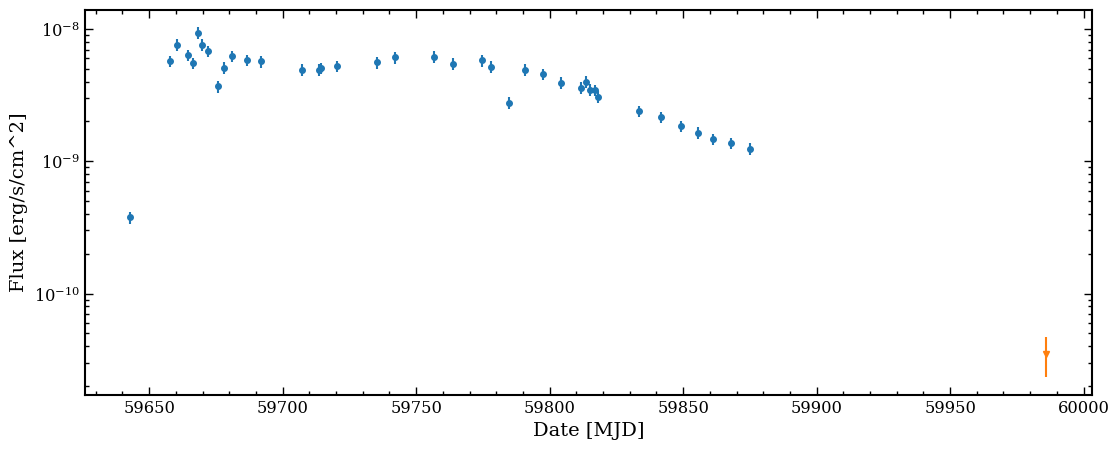

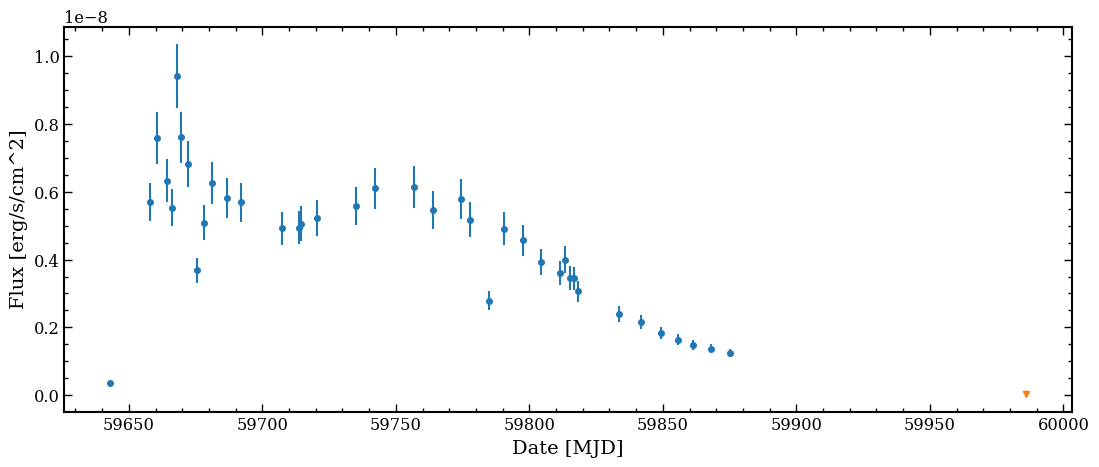

In [9]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

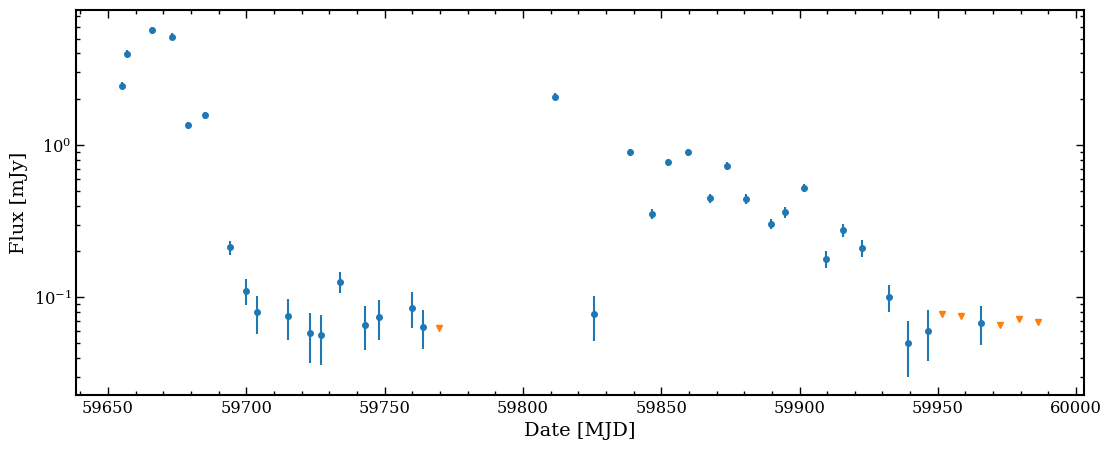

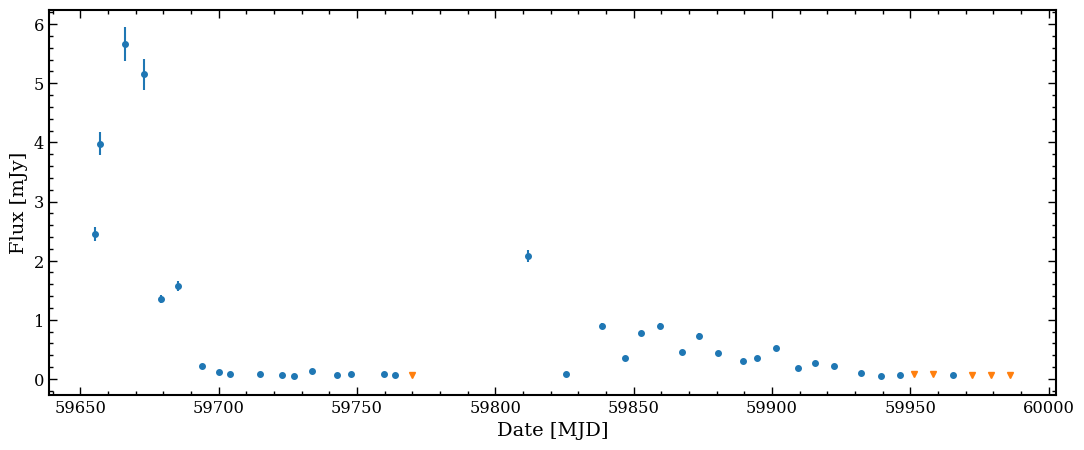

In [10]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [11]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59657.093350000     3.98000             0.20000             1         5.70000e-09                   5.70395e-10                   5.70395e-10                   False          False          HS             
59666.083070000     5.66700             0.28445             1         5.53000e-09                   5.53428e-10                   5.53428e-10                   False          False          SS             
59673.060930000     5.15000             0.25828             1         6.81000e-09                   6.81564e-10                   6.81564e-10                   False          False          SS             
59715.026420000     0.07500             0.02232             1         5.06000e-09                   5.07006e-10                   5.07006e-10                   False          F

In [12]:
lr_all, lx_all, all_types = get_bahramian_data()

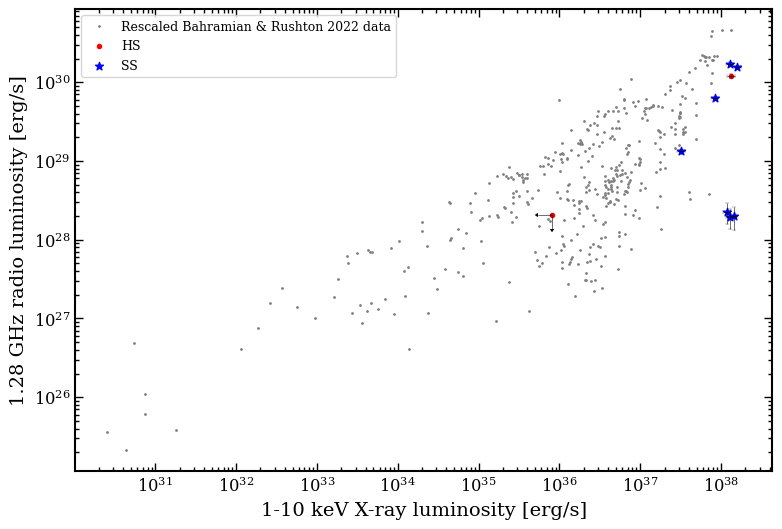

In [13]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  686
Rejected based on distance: radio_MJD = 59655.18698; time_to_nearest: 2.75850999999966; time_to_furthest: 12.228989999995974
59657.09335: time_to_nearest: 0.8521399999954156 & time_to_furthest: 14.135360000000219; y_predict_err: 0.05028535569457304
59666.08307: time_to_nearest: 0.21867000000202097 & time_to_furthest: 1.673000000002503; y_predict_err: 0.04116311839010045
59673.06093: time_to_nearest: 0.8543300000019372 & time_to_furthest: 2.594969999998284; y_predict_err: 0.04080683145066466
59679.06407: time_to_nearest: 1.0168499999999767 & time_to_furthest: 2.0321100000001024; y_predict_err: 0.03509160408720824
59685.19836: time_to_nearest: 1.4061499999952503 & time_to_furthest: 4.102180000001681; y_predict_err: 0.041591644646475245
Rejected based on distance: radio_MJD = 59694.08004; time_to_nearest: 2.0345500000039465; time_to_furthest: 13.093569999997271
Rejected based on distance: radio_MJD = 59700.02008; time_to_nearest: 7.1535

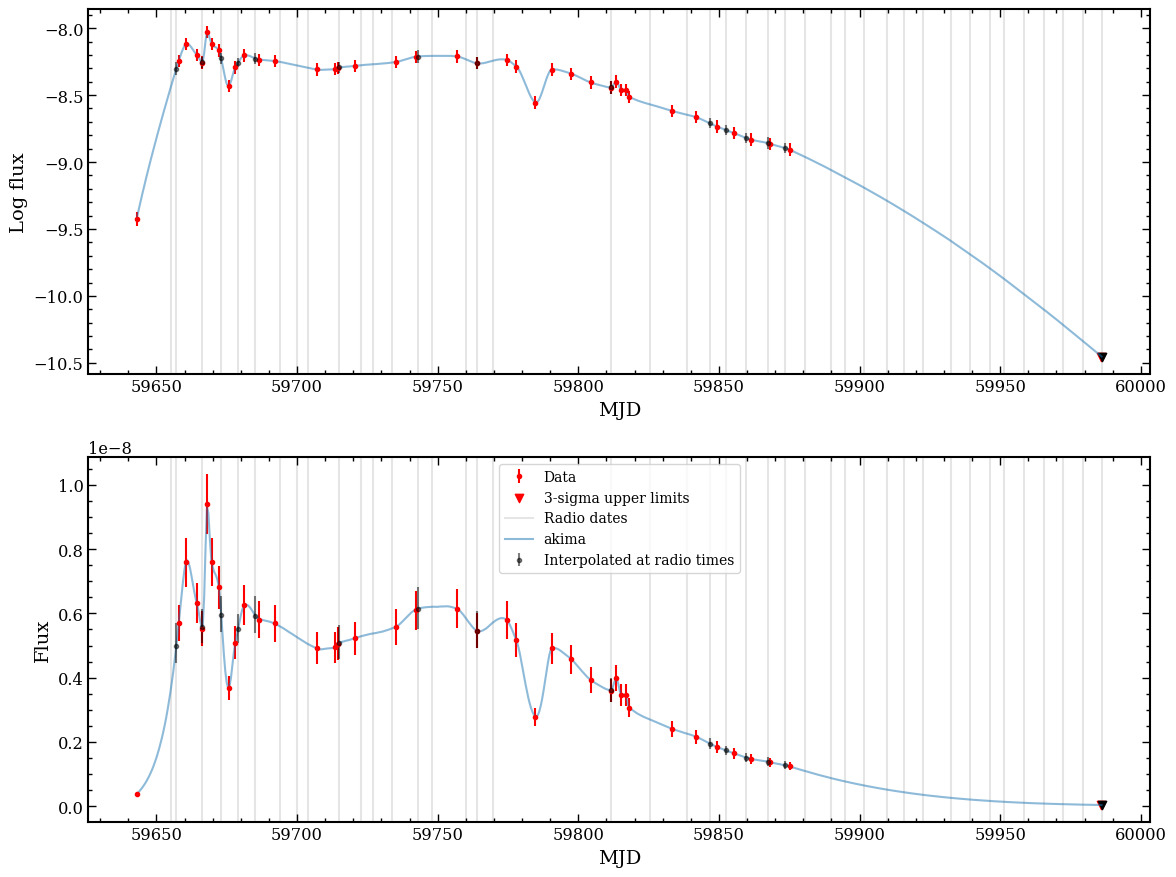

Number of used interpolated data points:  15
Converting to luminosity using d_kpc = 14.0


In [14]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

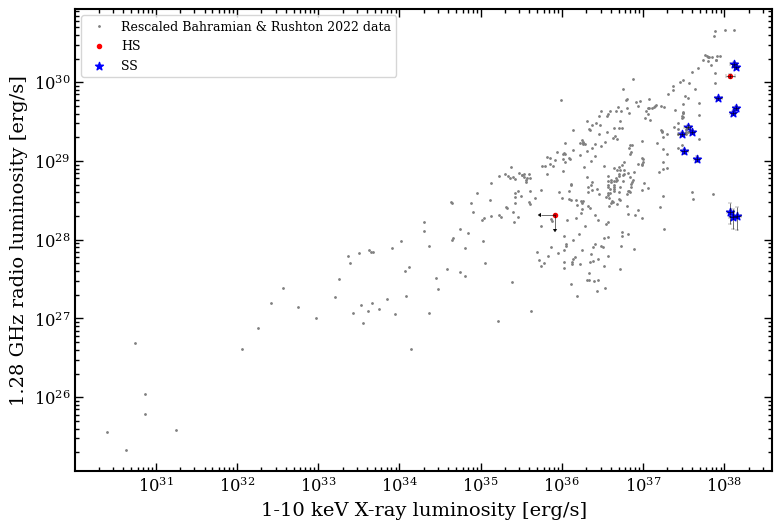

In [15]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)